In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 1
settings.gamma_range = (1,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 100000 
settings.HDXer_stride = 1
settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
# BPTI data

def preprocess_main_MD():
    pdb_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb"

    with open(pdb_path, 'r') as f:
        pdb = f.readlines()
        newlines = []
        for line in pdb:
            if line.startswith('ATOM'):
                # replace index 26 with " "
                line = line[:26] + " " + line[27:]

            newlines.append(line)

    with open('bpti-protein.pdb', 'w') as f:
        f.writelines(newlines)

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)

    SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

    dir_list = os.listdir(SHAW_dir)

    dcd_list = [i for i in dir_list if i.endswith(".dcd")]
    # remove any with small in name
    dcd_list = [i for i in dcd_list if not "_str" in i]

    dcd_list.sort()
    print(dcd_list)
    print(len(dcd_list))

    sim_name = "BPTI_SHAW"
    top_name = "bpti-protein_noalt.pdb"
    top_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb"
    reps = len(dcd_list)
    # reps =100

    traj_paths = ["/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.xtc"]

    u = mda.Universe(top_path, traj_paths[0])

    small_traj_name = traj_paths[0].replace(".xtc", "_xtal.xtc")

    with XTCWriter(small_traj_name, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory[::settings.stride]:
            W.write(u.atoms)
            W.write(u.atoms)
            break




        
    small_traj_paths = [small_traj_name]

    return hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name

In [6]:
import pandas as pd

In [7]:
# file_name = "covid_submissions_all_info.csv"

In [8]:
# sub_test = pd.read_csv(file_name)

In [9]:
# sub_test.columns.to_list()

In [10]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])

    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

In [11]:

hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name = preprocess_main_MD()


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name random_r already exists. Attempting to change name to random_r0
Experiment name random_r already exists. Attempting to change name to random_r1
Experiment name random_r already exists. Attempting to change name to random_r2
Experiment name random_r already exists. Attempting to change name to random_r3
Experiment name random_r already exists. Attempting to change name to random_r4
Experiment name random_r already exists. Attempting to change name to random_r5
Experiment name random_r already exists. Attempting to change name to random_r6
Experiment name random_r already exists. Attempting to change name to random_r7
Experiment name random_r already exists. Attempting to change name to random_r8
Experiment name random_r already exists. Attempting to change name to random_r9
Experiment name random_r already exists. Attempting to change name to random_r10
Experiment name random_r already exists. Attempt

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/random_r14/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 'restart_interval': 1

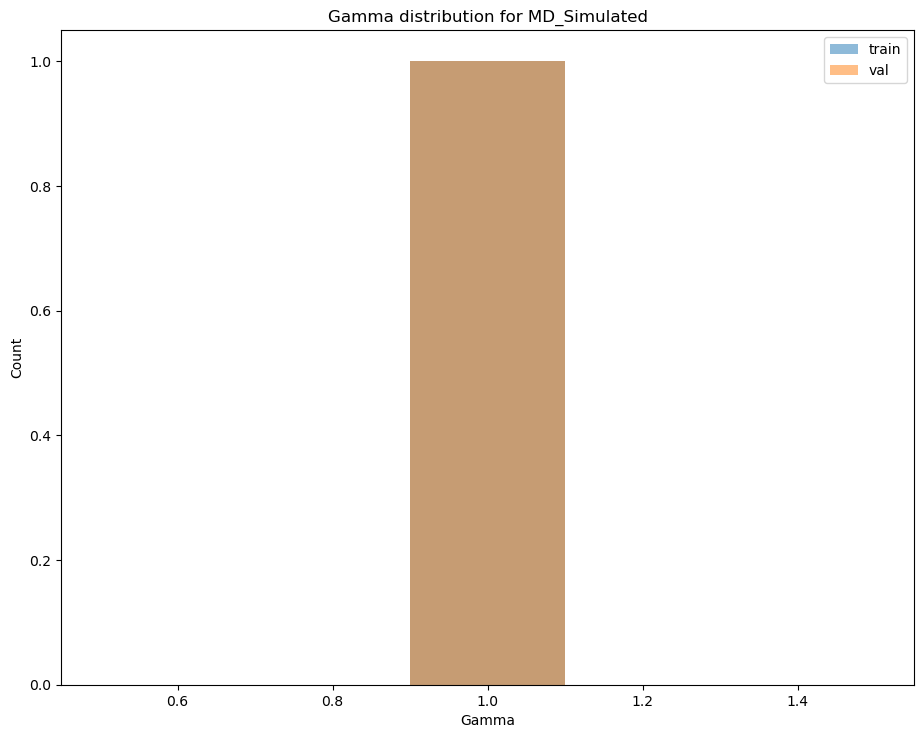

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.052391  0.255984  0.758901  0.999927       36  test_MD_Simulated_1   
119  0.098943  0.389302  0.760387  0.999927       37  test_MD_Simulated_1   
120  0.178251  0.690980  0.999991  1.000000       38  test_MD_Simulated_1   
121  0.092301  0.376993  0.782116  0.999977       39  test_MD_Simulated_1   
122  0.008764  0.050981  0.382873  0.966383       40  test_MD_Simulated_1   

     Re

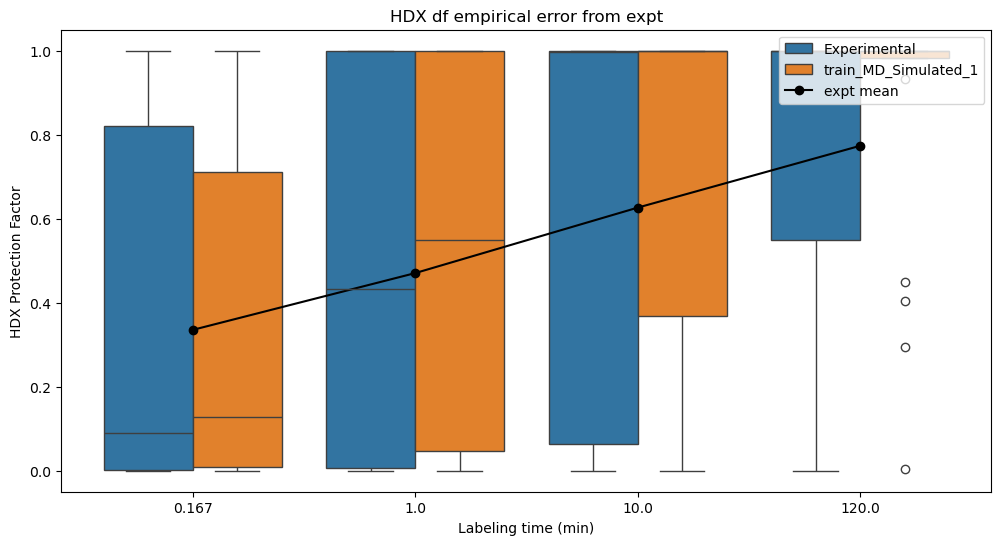

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.052391  0.255984  0.758901  0.999927       36  test_MD_Simulated_1   
119  0.098943  0.389302  0.760387  0.999927       37  test_MD_Simulated_1   
120  0.178251  0.690980  0.999991  1.000000       38  test_MD_Simulated_1   
121  0.092301  0.376993  0.782116  0.999977       39  test_MD_Simulated_1   
122  0.008764  0.050981  0.382873  0.966383       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

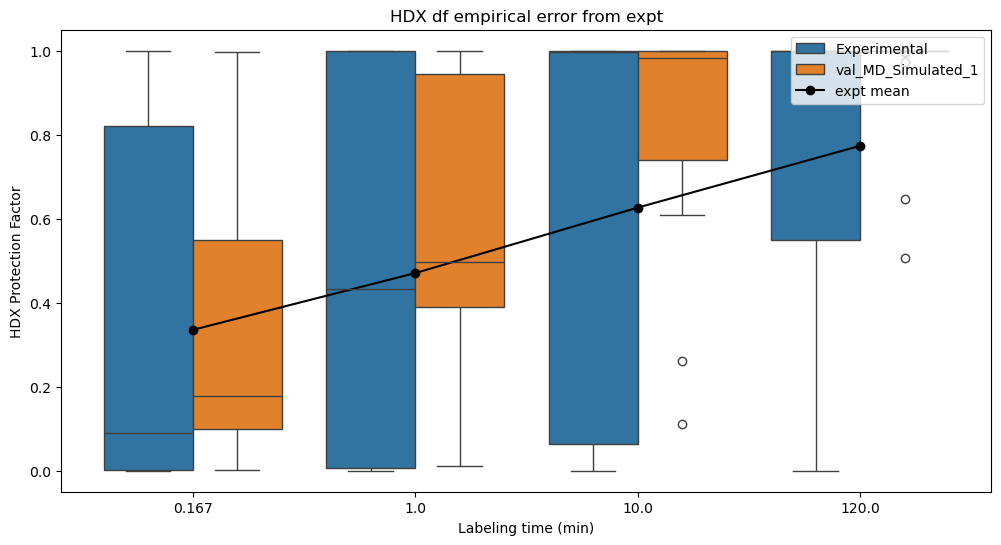

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.052391  0.255984  0.758901  0.999927       36  test_MD_Simulated_1   
119  0.098943  0.389302  0.760387  0.999927       37  test_MD_Simulated_1   
120  0.178251  0.690980  0.999991  1.000000       38  test_MD_Simulated_1   
121  0.092301  0.376993  0.782116  0.999977       39  test_MD_Simulated_1   
122  0.008764  0.050981  0.382873  0.966383       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

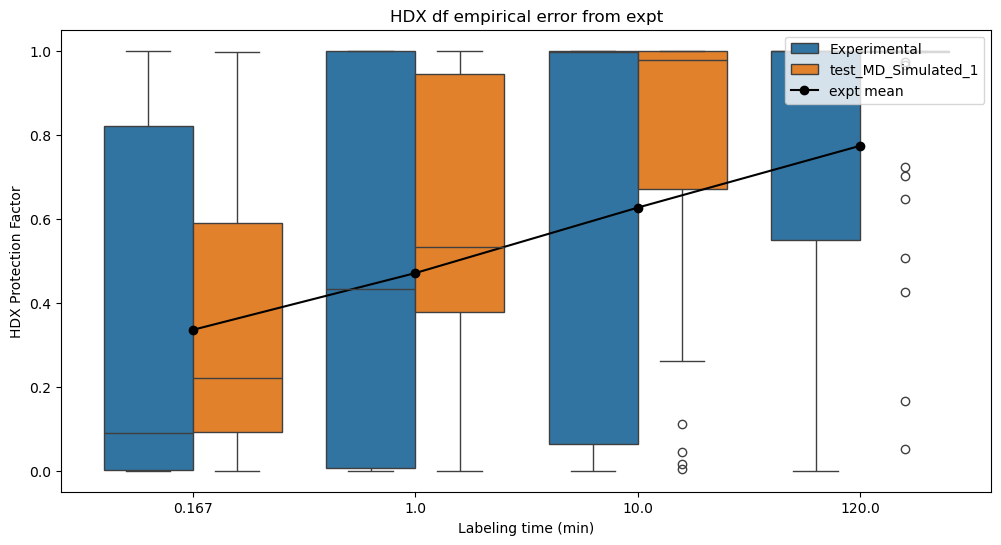

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.000720  0.004310  0.042310  0.404770       24  train_MD_Simulated_1   
1   0.000490  0.002910  0.028750  0.295390       13  train_MD_Simulated_1   
2   0.254070  0.827130  1.000000  1.000000        8  train_MD_Simulated_1   
3   0.000830  0.004940  0.048340  0.448200       25  train_MD_Simulated_1   
4   0.997040  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       .

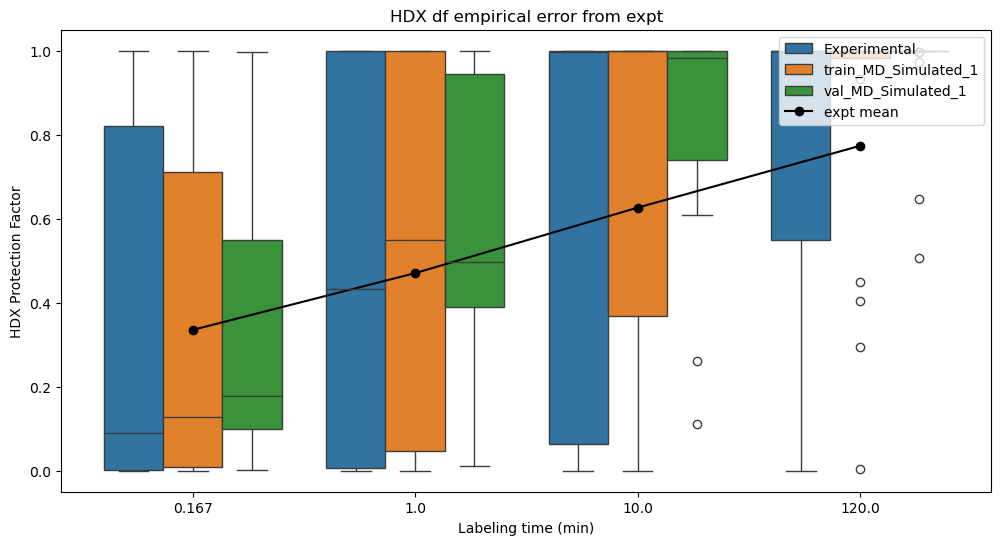

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.052391  0.255984  0.758901  0.999927       36  test_MD_Simulated_1   
119  0.098943  0.389302  0.760387  0.999927       37  test_MD_Simulated_1   
120  0.178251  0.690980  0.999991  1.000000       38  test_MD_Simulated_1   
121  0.092301  0.376993  0.782116  0.999977       39  test_MD_Simulated_1   
122  0.008764  0.050981  0.382873  0.966383       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

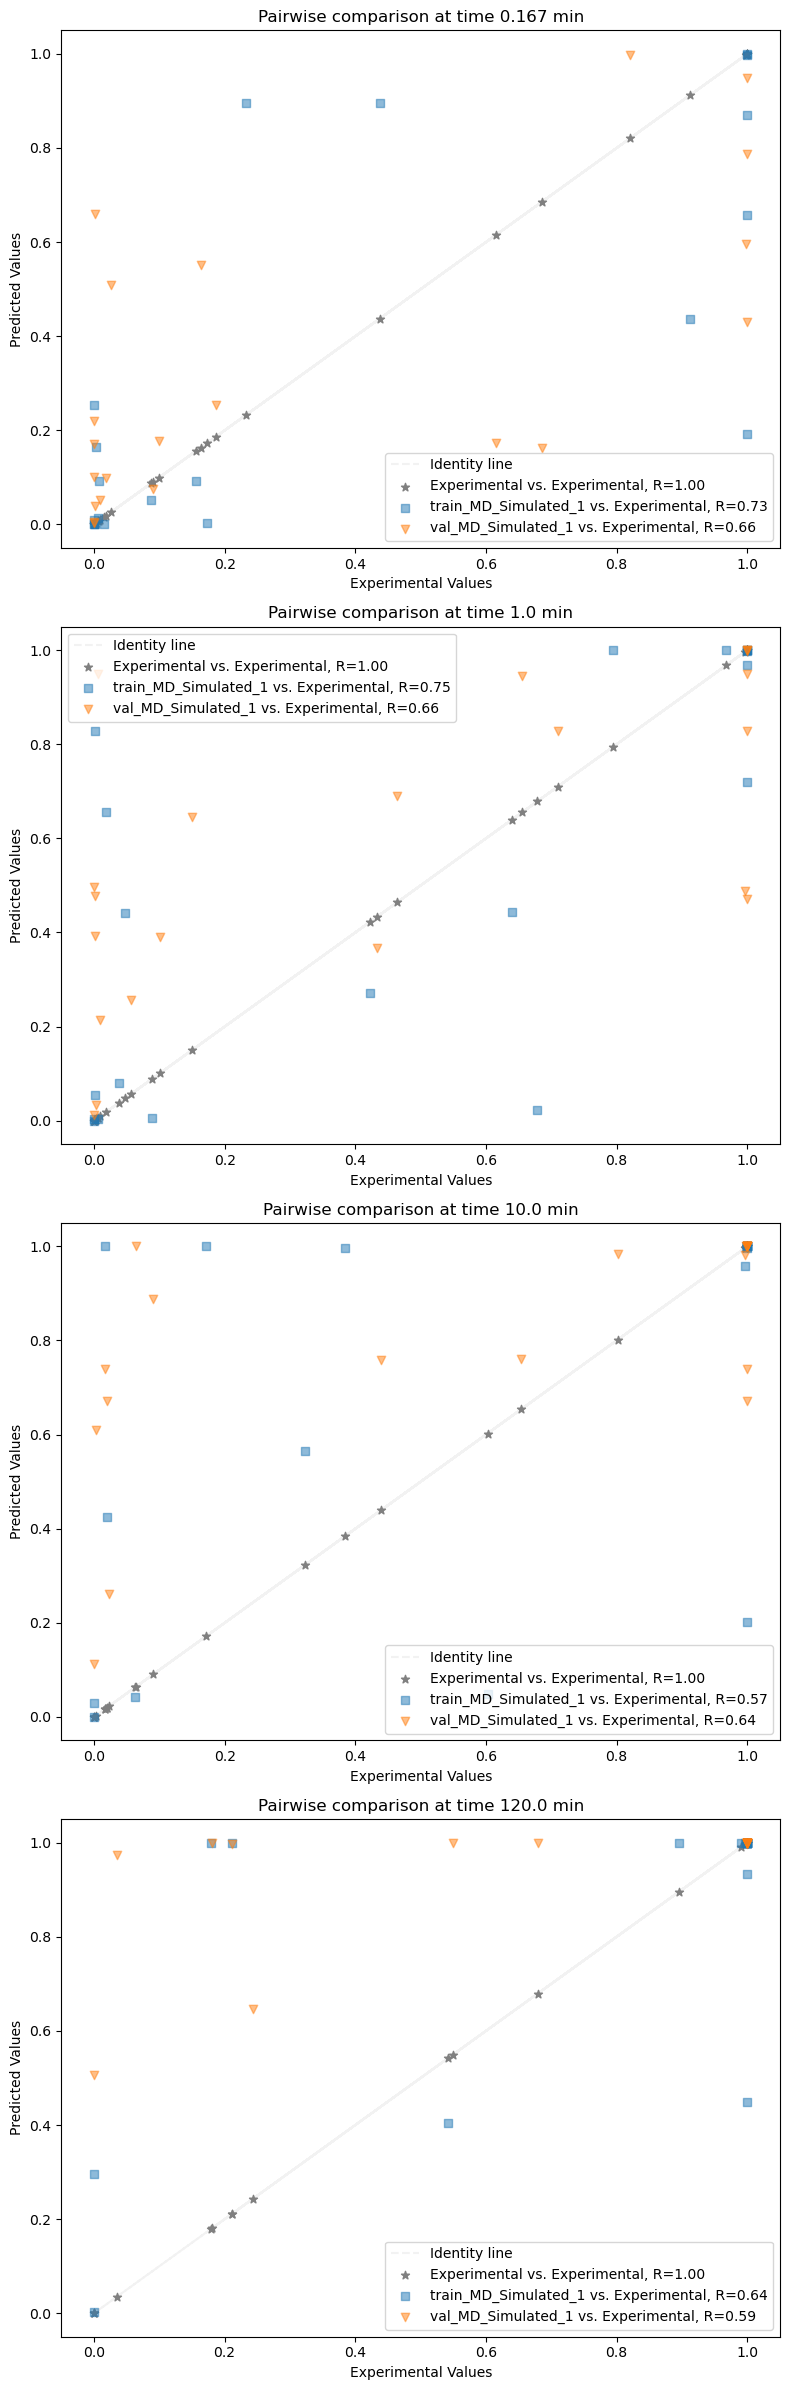

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.052391  0.255984  0.758901  0.999927       36  test_MD_Simulated_1   
119  0.098943  0.389302  0.760387  0.999927       37  test_MD_Simulated_1   
120  0.178251  0.690980  0.999991  1.000000       38  test_MD_Simulated_1   
121  0.092301  0.376993  0.782116  0.999977       39  test_MD_Simulated_1   
122  0.008764  0.050981  0.382873  0.966383       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


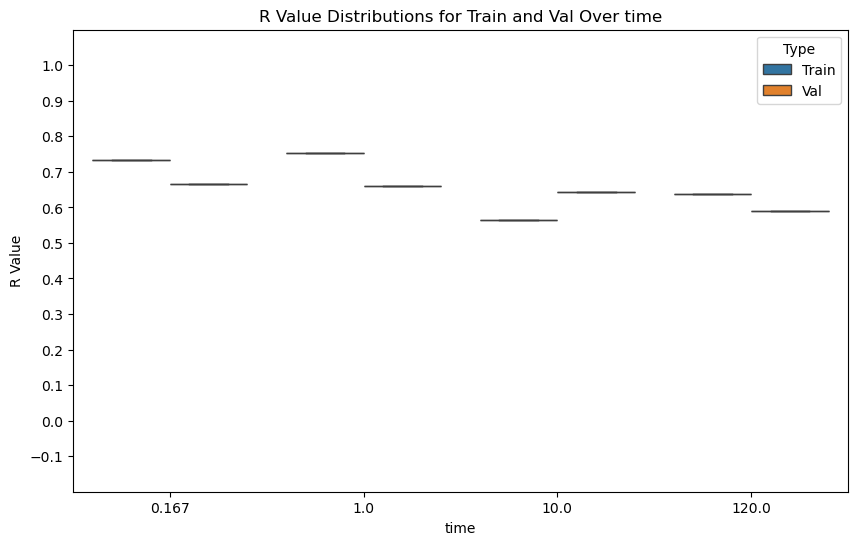

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.000720  0.004310  0.042310  0.404770       24  train_MD_Simulated_1   
1   0.000490  0.002910  0.028750  0.295390       13  train_MD_Simulated_1   
2   0.254070  0.827130  1.000000  1.000000        8  train_MD_Simulated_1   
3   0.000830  0.004940  0.048340  0.448200       25  train_MD_Simulated_1   
4   0.997040  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.658658  0.950121  1.000000  1.000000       31    val_MD_Simulated_1   
78  0.788144  0.998694  1.000000  1.000000       33    val_MD_Simulated_1   
79  0.052391  0.255984  0.758901  0.999927       36    val_MD_Simulated_1   
80  0.098943  0.389302  0.760387  0.999927       37    val_MD_Simulated_1   
81  0.178251  0.690980  0.999991  1.000000       38    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

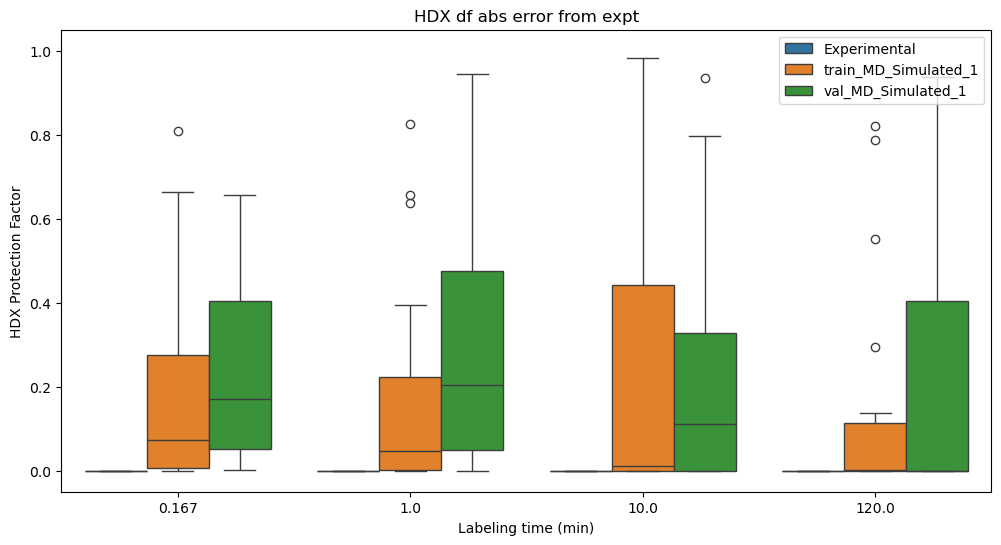

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00072  0.00431  0.04231  0.40477       24  train_MD_Simulated_1   
1    0.00049  0.00291  0.02875  0.29539       13  train_MD_Simulated_1   
2    0.25407  0.82713  1.00000  1.00000        8  train_MD_Simulated_1   
3    0.00083  0.00494  0.04834  0.44820       25  train_MD_Simulated_1   
4    0.99704  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

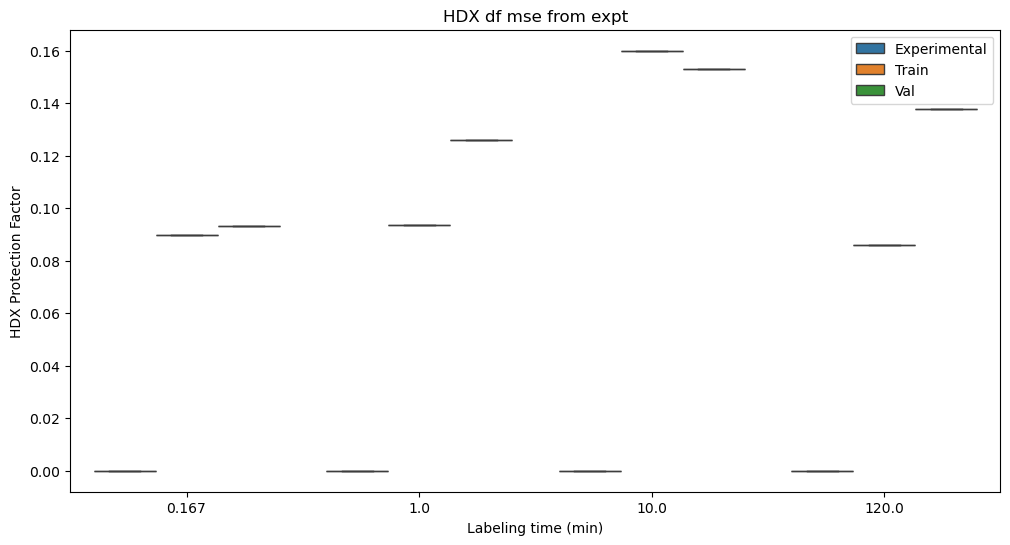

Saving experiment to:  logs/random_r14_1706635120.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name sequential_s already exists. Attempting to change name to sequential_s0
Experiment name sequential_s already exists. Attempting to change name to sequential_s1
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/sequential_s1/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 

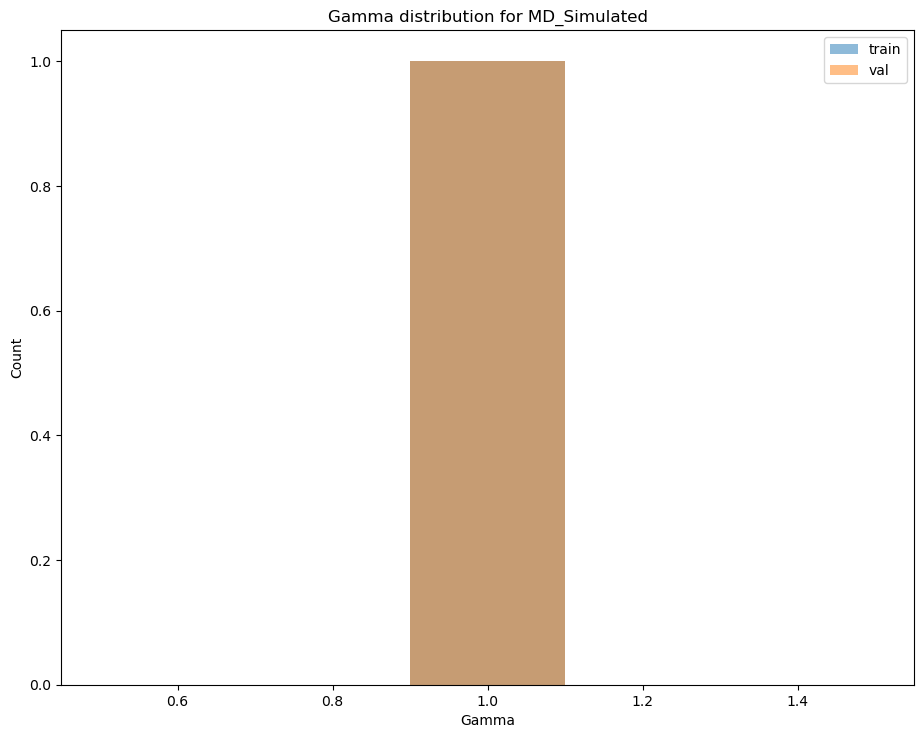

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.009598  0.055272  0.378671  0.876724       36  test_MD_Simulated_1   
119  0.032356  0.166644  0.544756  0.876726       37  test_MD_Simulated_1   
120  0.060084  0.309905  0.975183  1.000000       38  test_MD_Simulated_1   
121  0.029682  0.154901  0.540919  0.877917       39  test_MD_Simulated_1   
122  0.001217  0.007257  0.069417  0.522230       40  test_MD_Simulated_1   

     Re

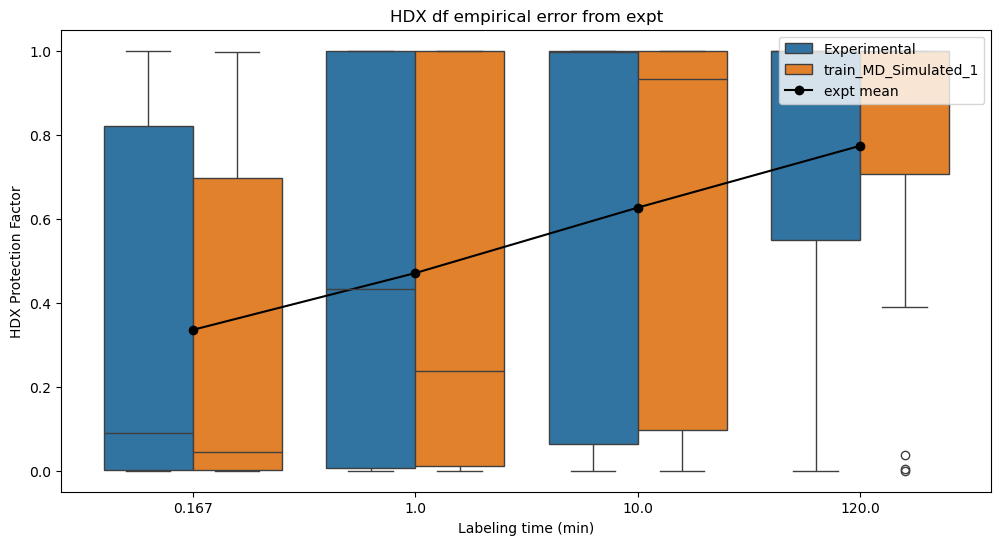

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.009598  0.055272  0.378671  0.876724       36  test_MD_Simulated_1   
119  0.032356  0.166644  0.544756  0.876726       37  test_MD_Simulated_1   
120  0.060084  0.309905  0.975183  1.000000       38  test_MD_Simulated_1   
121  0.029682  0.154901  0.540919  0.877917       39  test_MD_Simulated_1   
122  0.001217  0.007257  0.069417  0.522230       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

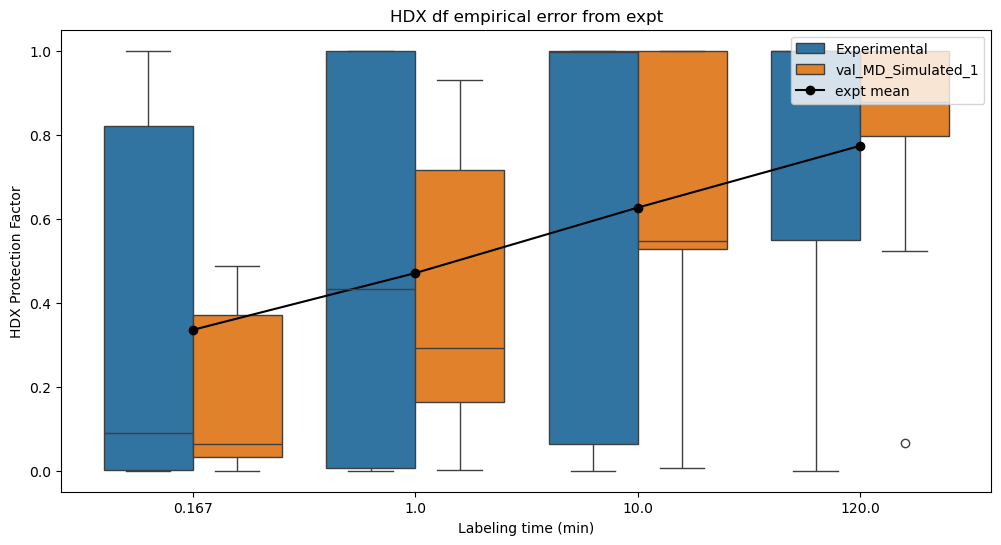

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.009598  0.055272  0.378671  0.876724       36  test_MD_Simulated_1   
119  0.032356  0.166644  0.544756  0.876726       37  test_MD_Simulated_1   
120  0.060084  0.309905  0.975183  1.000000       38  test_MD_Simulated_1   
121  0.029682  0.154901  0.540919  0.877917       39  test_MD_Simulated_1   
122  0.001217  0.007257  0.069417  0.522230       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

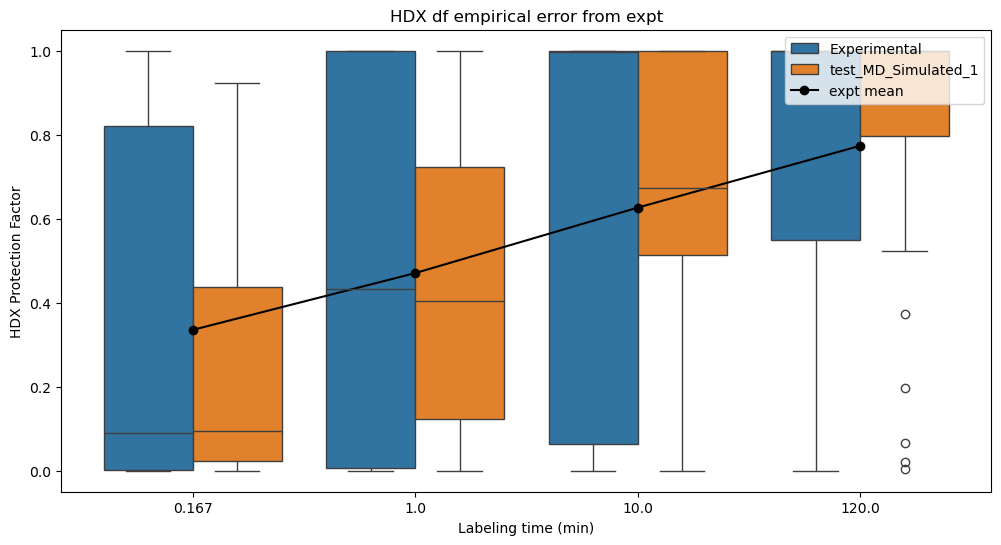

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_rep_peptides [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.021680  0.122980  0.730770  1.000000        0  train_MD_Simulated_1   
1   0.015890  0.091480  0.616880  0.999990        1  train_MD_Simulated_1   
2   0.812330  0.999960  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.093930  0.446020  0.997280  1.000000        3  train_MD_Simulated_1   
4   0.926410  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       .

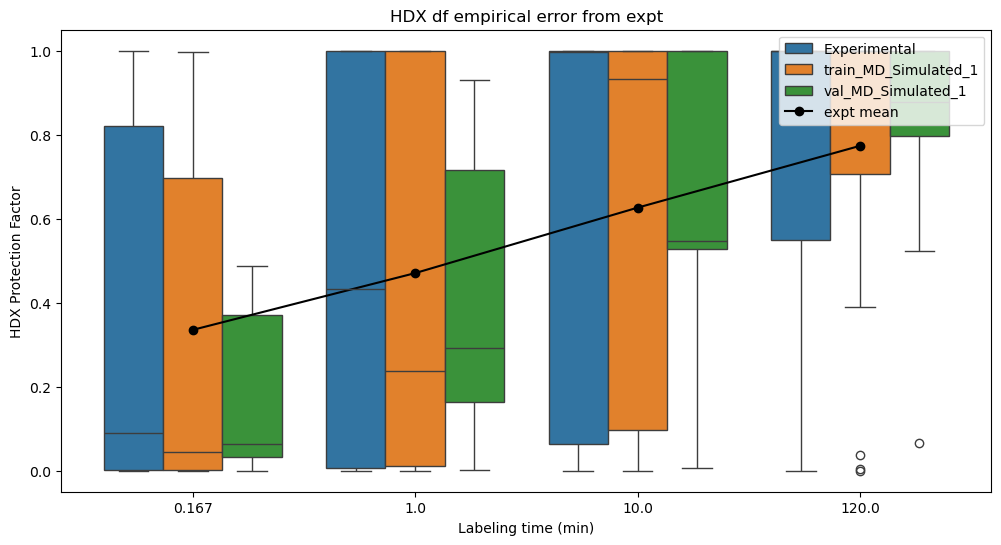

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.009598  0.055272  0.378671  0.876724       36  test_MD_Simulated_1   
119  0.032356  0.166644  0.544756  0.876726       37  test_MD_Simulated_1   
120  0.060084  0.309905  0.975183  1.000000       38  test_MD_Simulated_1   
121  0.029682  0.154901  0.540919  0.877917       39  test_MD_Simulated_1   
122  0.001217  0.007257  0.069417  0.522230       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

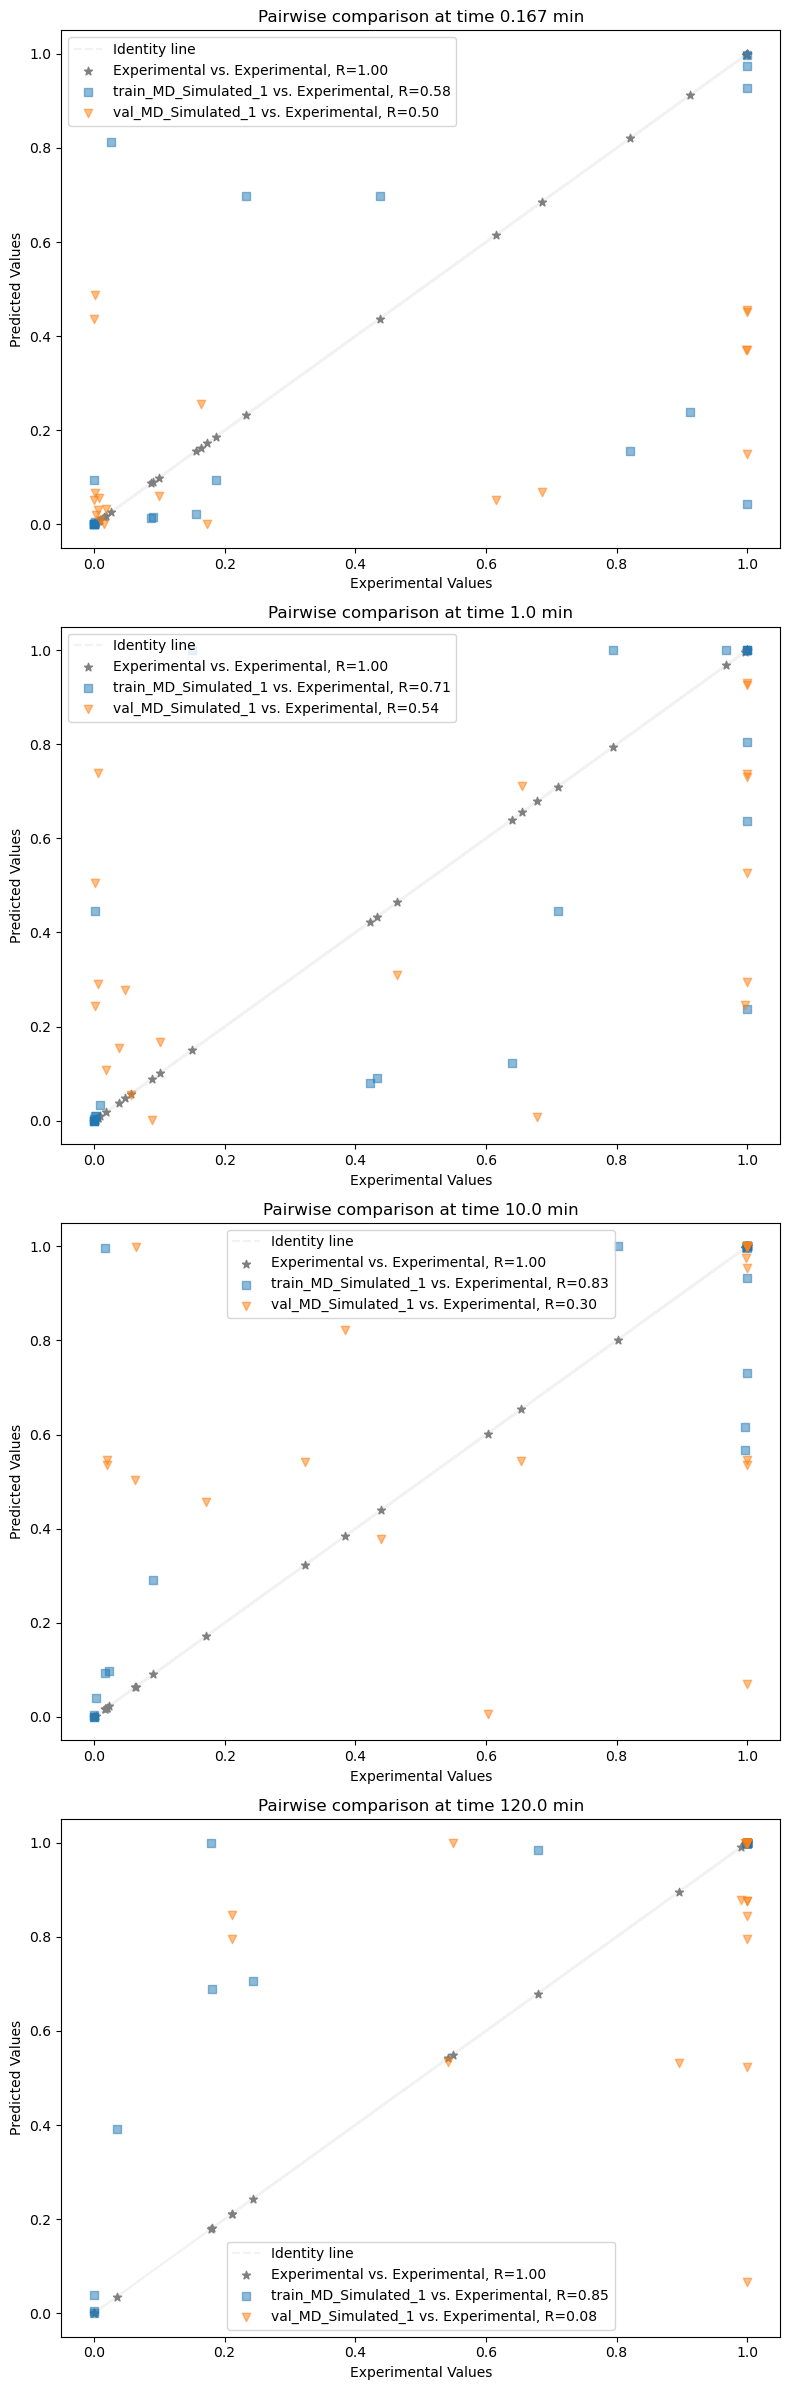

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.009598  0.055272  0.378671  0.876724       36  test_MD_Simulated_1   
119  0.032356  0.166644  0.544756  0.876726       37  test_MD_Simulated_1   
120  0.060084  0.309905  0.975183  1.000000       38  test_MD_Simulated_1   
121  0.029682  0.154901  0.540919  0.877917       39  test_MD_Simulated_1   
122  0.001217  0.007257  0.069417  0.522230       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


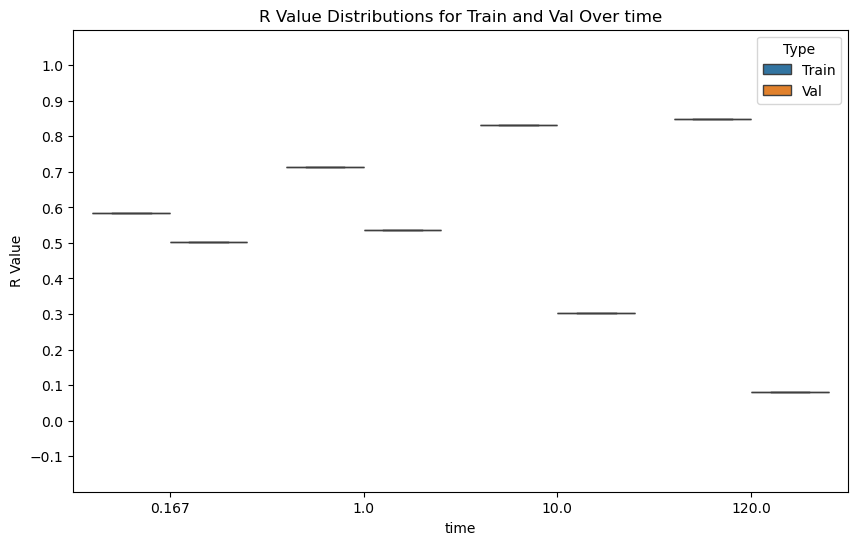

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.021680  0.122980  0.730770  1.000000        0  train_MD_Simulated_1   
1   0.015890  0.091480  0.616880  0.999990        1  train_MD_Simulated_1   
2   0.812330  0.999960  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.093930  0.446020  0.997280  1.000000        3  train_MD_Simulated_1   
4   0.926410  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.009598  0.055272  0.378671  0.876724       36    val_MD_Simulated_1   
78  0.032356  0.166644  0.544756  0.876726       37    val_MD_Simulated_1   
79  0.060084  0.309905  0.975183  1.000000       38    val_MD_Simulated_1   
80  0.029682  0.154901  0.540919  0.877917       39    val_MD_Simulated_1   
81  0.001217  0.007257  0.069417  0.522230       40    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

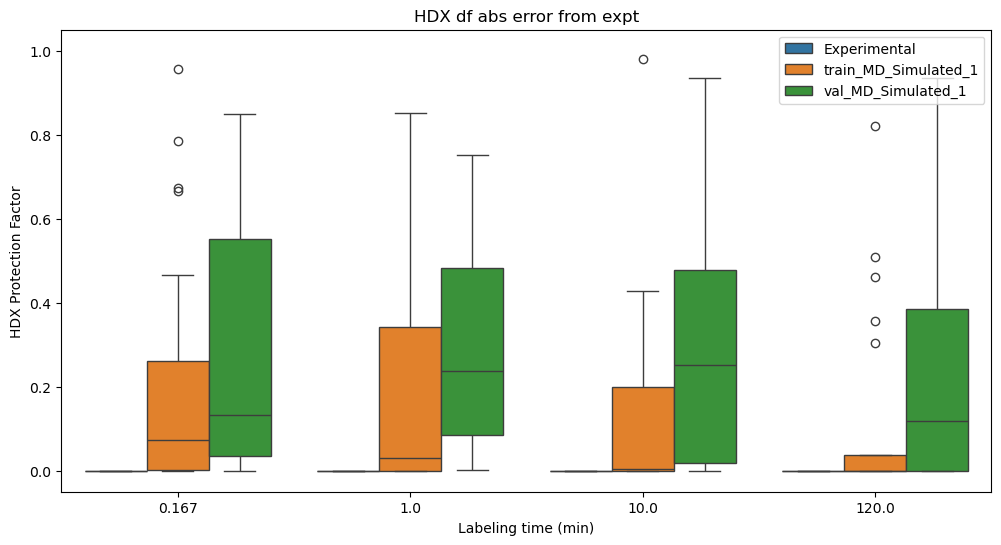

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.02168  0.12298  0.73077  1.00000        0  train_MD_Simulated_1   
1    0.01589  0.09148  0.61688  0.99999        1  train_MD_Simulated_1   
2    0.81233  0.99996  1.00000  1.00000        2  train_MD_Simulated_1   
3    0.09393  0.44602  0.99728  1.00000        3  train_MD_Simulated_1   
4    0.92641  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

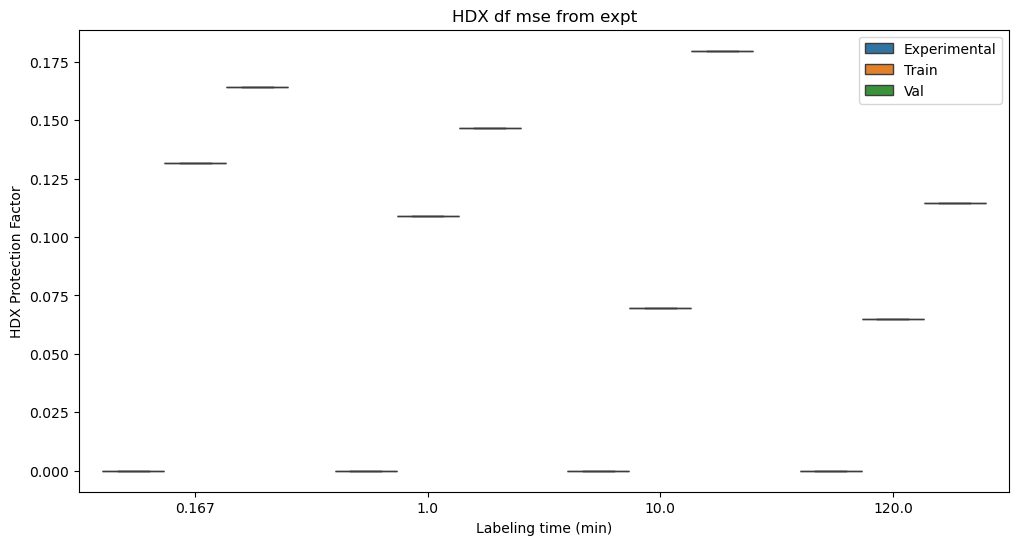

Saving experiment to:  logs/sequential_s1_1706635127.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R0
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R1
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/redundancy_R1/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 

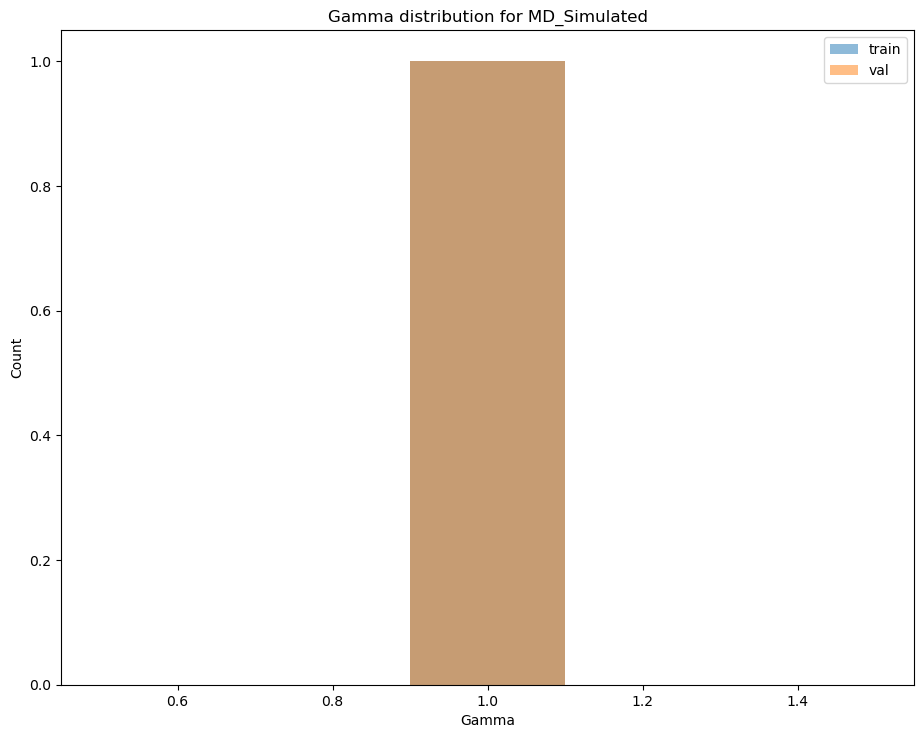

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.285044  0.540921  0.804725  0.999994       36  test_MD_Simulated_1   
119  0.060979  0.289907  0.804131  0.999994       37  test_MD_Simulated_1   
120  0.101936  0.474512  0.998331  1.000000       38  test_MD_Simulated_1   
121  0.058853  0.287024  0.851728  1.000000       39  test_MD_Simulated_1   
122  0.013283  0.076268  0.511391  0.994863       40  test_MD_Simulated_1   

     Re

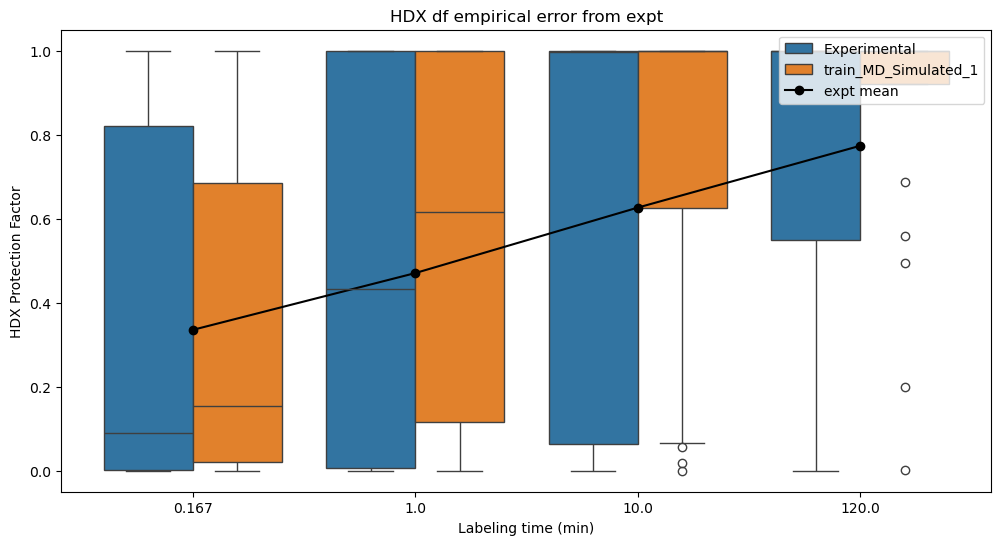

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.285044  0.540921  0.804725  0.999994       36  test_MD_Simulated_1   
119  0.060979  0.289907  0.804131  0.999994       37  test_MD_Simulated_1   
120  0.101936  0.474512  0.998331  1.000000       38  test_MD_Simulated_1   
121  0.058853  0.287024  0.851728  1.000000       39  test_MD_Simulated_1   
122  0.013283  0.076268  0.511391  0.994863       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

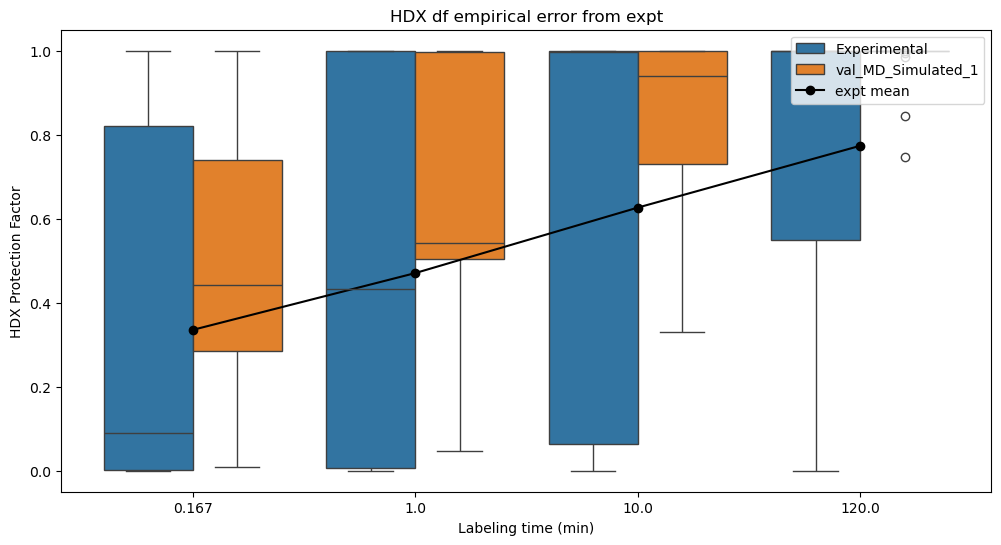

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.285044  0.540921  0.804725  0.999994       36  test_MD_Simulated_1   
119  0.060979  0.289907  0.804131  0.999994       37  test_MD_Simulated_1   
120  0.101936  0.474512  0.998331  1.000000       38  test_MD_Simulated_1   
121  0.058853  0.287024  0.851728  1.000000       39  test_MD_Simulated_1   
122  0.013283  0.076268  0.511391  0.994863       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

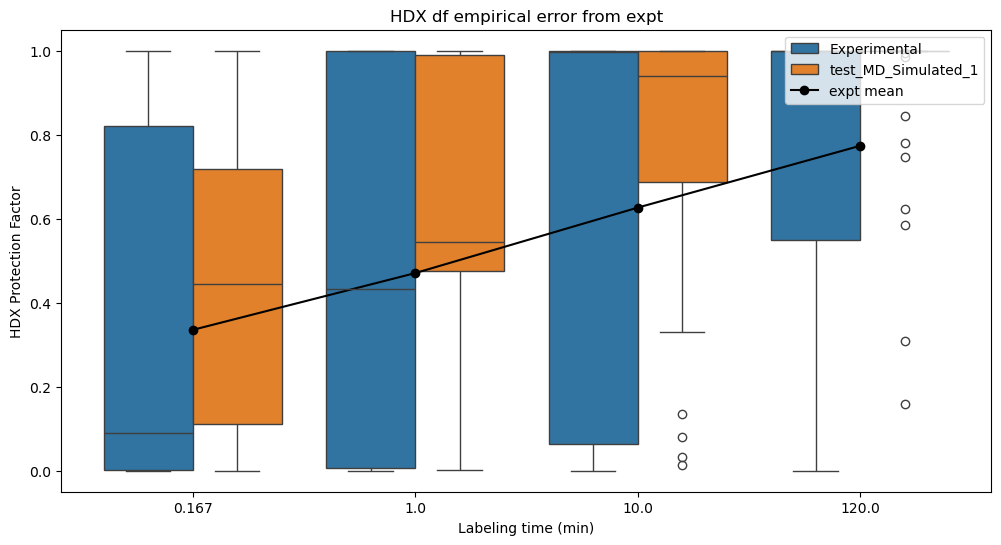

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [0, 1, 2, 3, 5, 6, 9, 11, 12, 13, 16, 17, 19, 21, 23, 24, 25, 31, 34, 37]
val_rep_peptides [4, 7, 8, 10, 14, 15, 18, 20, 22, 26, 27, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.078670  0.387780  0.992600  1.000000        0  train_MD_Simulated_1   
1   0.035270  0.193480  0.883540  1.000000        1  train_MD_Simulated_1   
2   0.999580  1.000000  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.674300  0.998790  1.000000  1.000000        3  train_MD_Simulated_1   
4   0.203450  0.743860  1.000000  1.000000        5  train_MD_Simulated_1   
..       ...       ...       ...       .

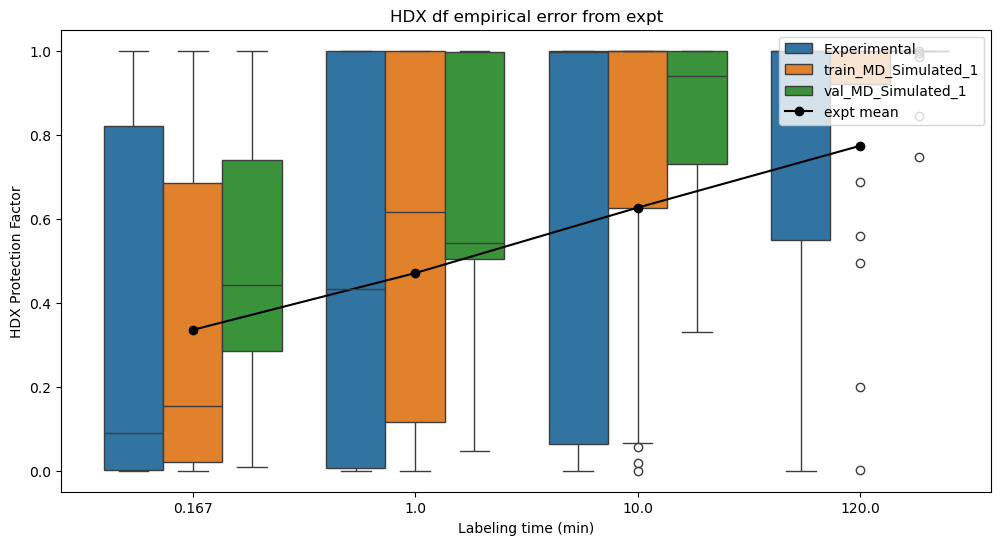

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.285044  0.540921  0.804725  0.999994       36  test_MD_Simulated_1   
119  0.060979  0.289907  0.804131  0.999994       37  test_MD_Simulated_1   
120  0.101936  0.474512  0.998331  1.000000       38  test_MD_Simulated_1   
121  0.058853  0.287024  0.851728  1.000000       39  test_MD_Simulated_1   
122  0.013283  0.076268  0.511391  0.994863       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

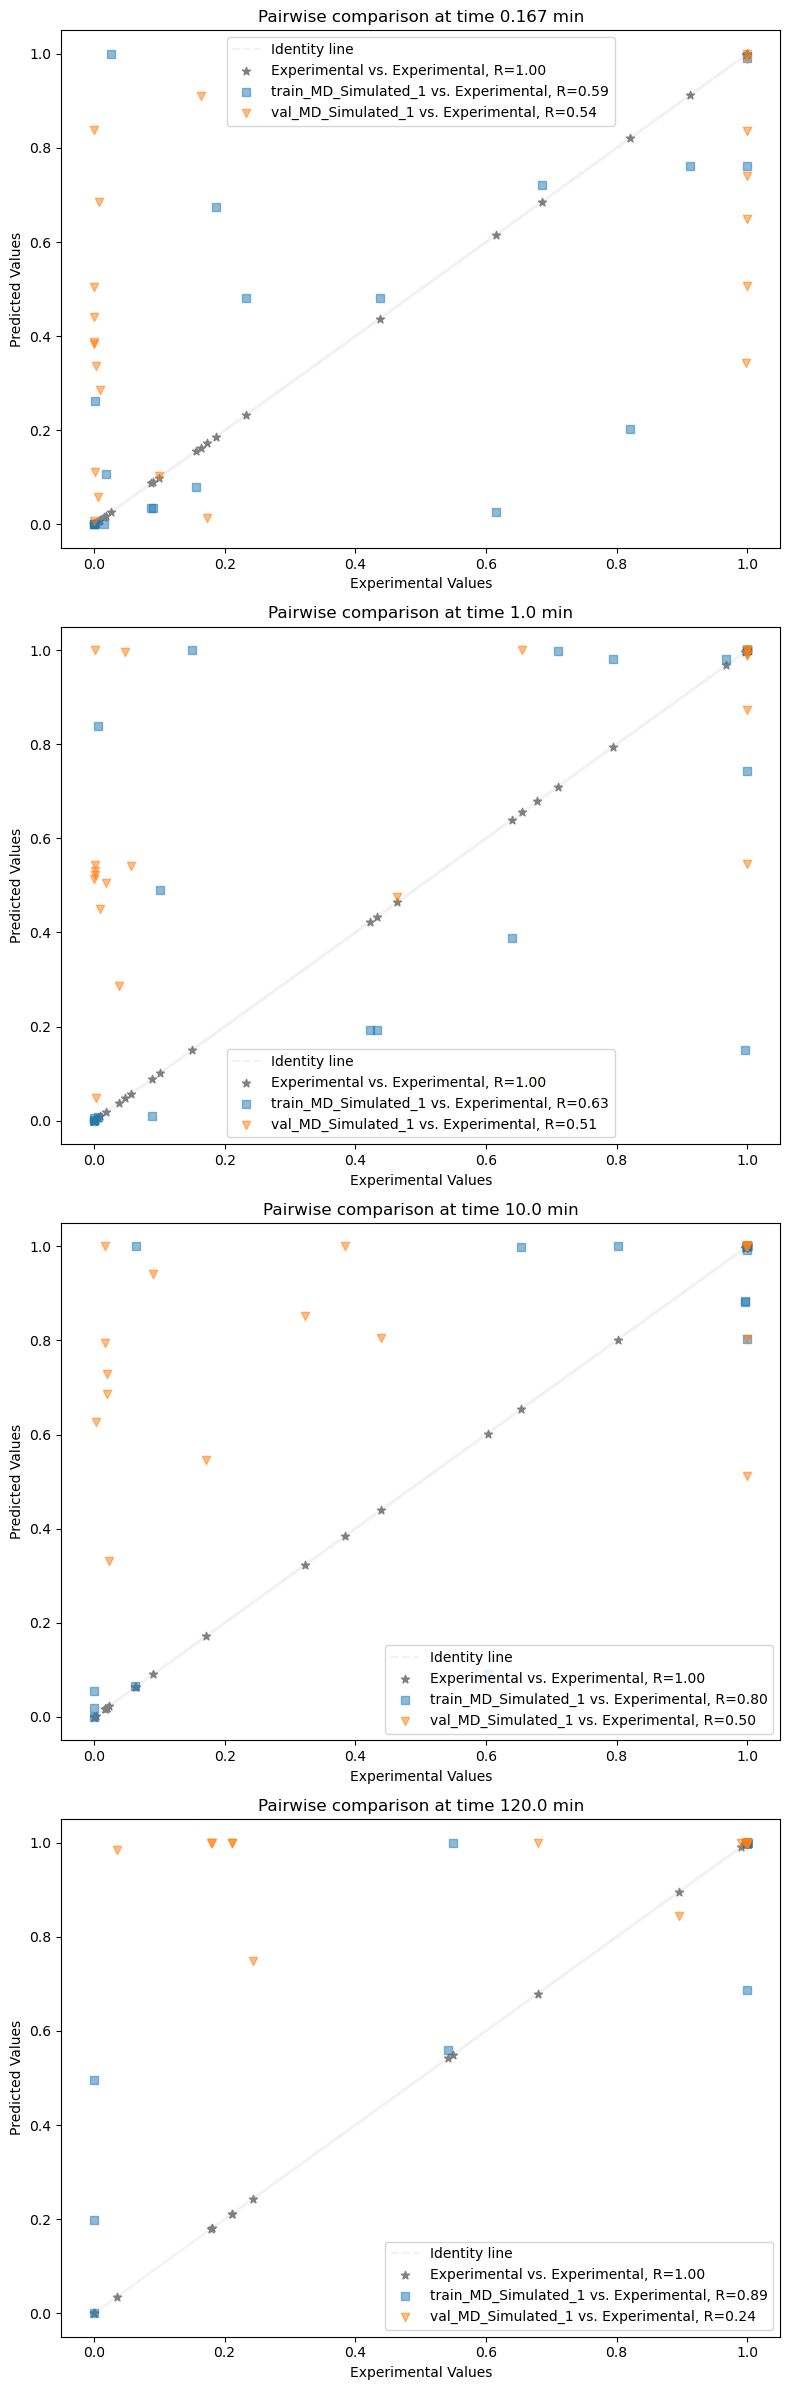

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.285044  0.540921  0.804725  0.999994       36  test_MD_Simulated_1   
119  0.060979  0.289907  0.804131  0.999994       37  test_MD_Simulated_1   
120  0.101936  0.474512  0.998331  1.000000       38  test_MD_Simulated_1   
121  0.058853  0.287024  0.851728  1.000000       39  test_MD_Simulated_1   
122  0.013283  0.076268  0.511391  0.994863       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


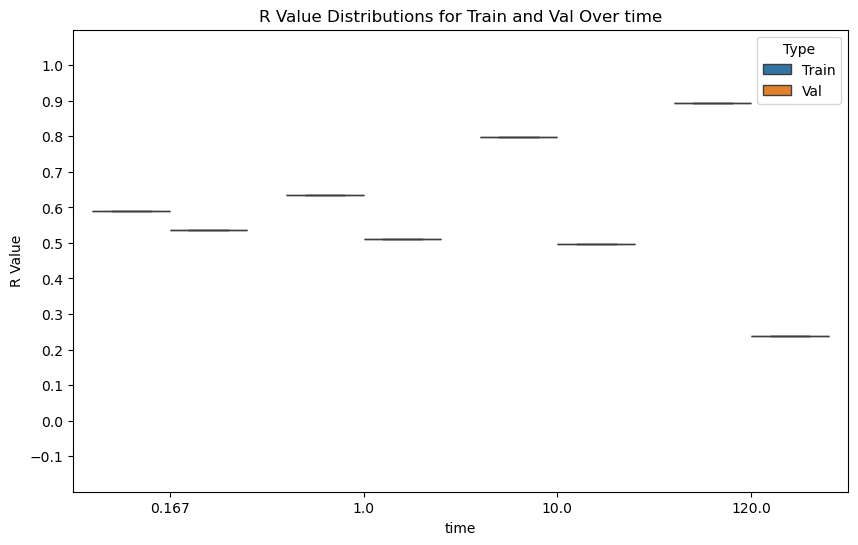

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.078670  0.387780  0.992600  1.000000        0  train_MD_Simulated_1   
1   0.035270  0.193480  0.883540  1.000000        1  train_MD_Simulated_1   
2   0.999580  1.000000  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.674300  0.998790  1.000000  1.000000        3  train_MD_Simulated_1   
4   0.203450  0.743860  1.000000  1.000000        5  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.686158  0.996035  1.000000  1.000000       35    val_MD_Simulated_1   
78  0.285044  0.540921  0.804725  0.999994       36    val_MD_Simulated_1   
79  0.101936  0.474512  0.998331  1.000000       38    val_MD_Simulated_1   
80  0.058853  0.287024  0.851728  1.000000       39    val_MD_Simulated_1   
81  0.013283  0.076268  0.511391  0.994863       40    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

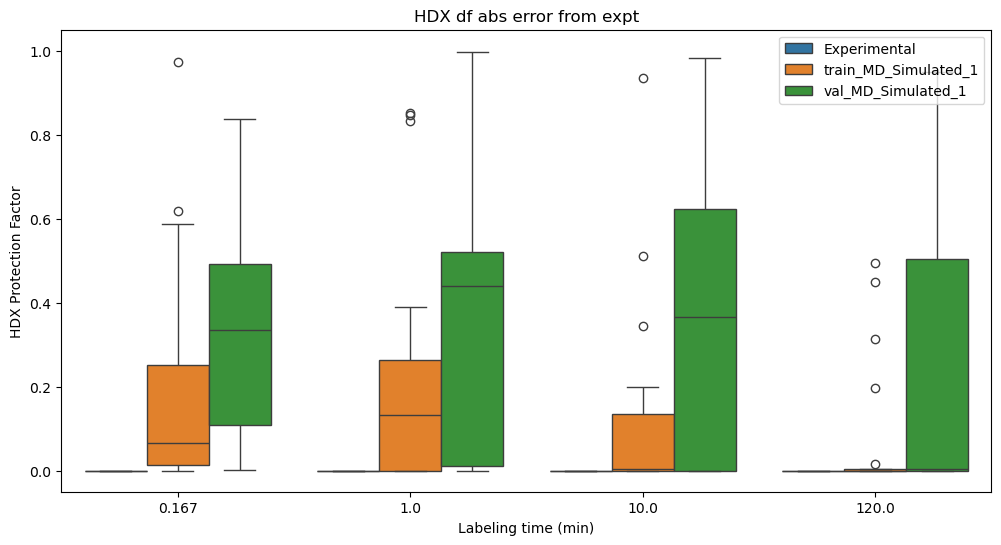

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.07867  0.38778  0.99260  1.00000        0  train_MD_Simulated_1   
1    0.03527  0.19348  0.88354  1.00000        1  train_MD_Simulated_1   
2    0.99958  1.00000  1.00000  1.00000        2  train_MD_Simulated_1   
3    0.67430  0.99879  1.00000  1.00000        3  train_MD_Simulated_1   
4    0.20345  0.74386  1.00000  1.00000        5  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

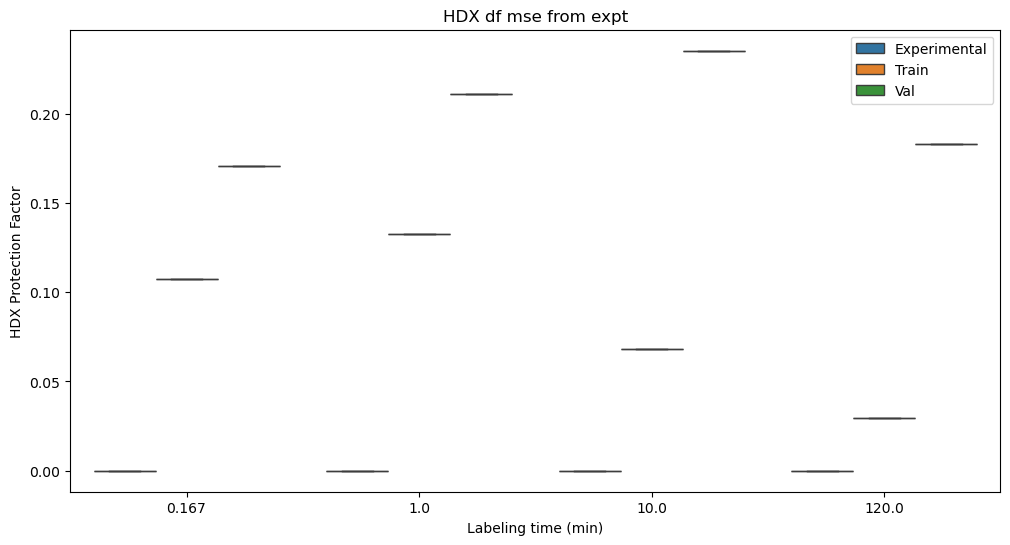

Saving experiment to:  logs/redundancy_R1_1706635135.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [12]:

splits = ['r', 's', 'R']
split_names = ['random', 'sequential', 'redundancy']
system = 'BPTIshaw_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps[name] = analysis_dump[name]
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



In [13]:
print(analysis_df)

       time          Type         R             calc_name       mse  \
0     0.167         Train  0.733430  train_MD_Simulated_1       NaN   
1     0.167           Val  0.664901    val_MD_Simulated_1       NaN   
2     1.000         Train  0.754395  train_MD_Simulated_1       NaN   
3     1.000           Val  0.660494    val_MD_Simulated_1       NaN   
4    10.000         Train  0.565083  train_MD_Simulated_1       NaN   
5    10.000           Val  0.642410    val_MD_Simulated_1       NaN   
6   120.000         Train  0.638892  train_MD_Simulated_1       NaN   
7   120.000           Val  0.589666    val_MD_Simulated_1       NaN   
8     0.167  Experimental       NaN          Experimental  0.000000   
9     0.167         Train       NaN  train_MD_Simulated_1  0.089821   
10    0.167           Val       NaN    val_MD_Simulated_1  0.093218   
11    1.000  Experimental       NaN          Experimental  0.000000   
12    1.000         Train       NaN  train_MD_Simulated_1  0.093468   
13    

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


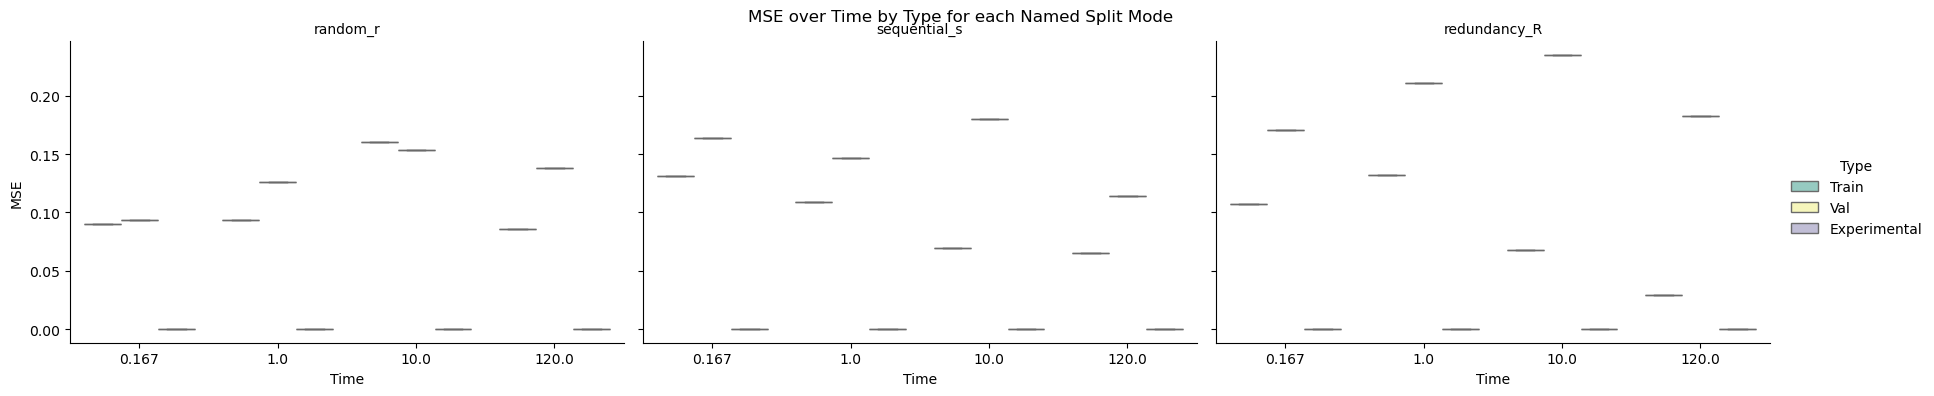

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


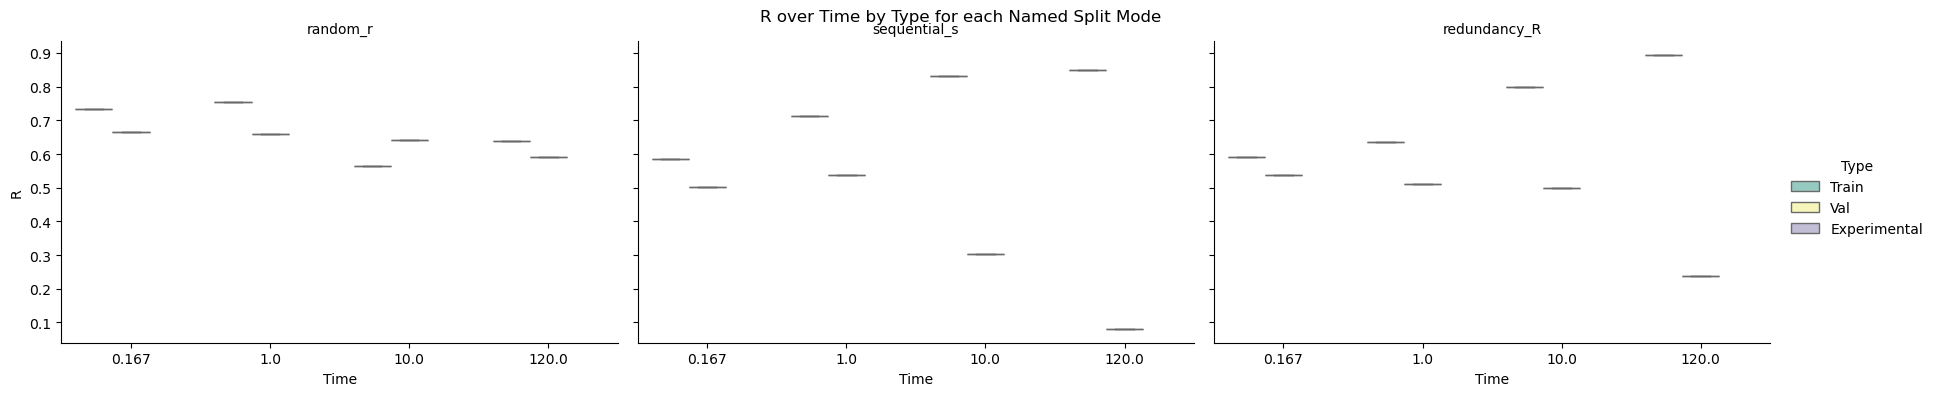

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
